# Regression
In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome' or 'target' variable) and one or more independent variables (often called 'predictors', 'covariates', or 'features'). The most common form of regression analysis is linear regression.

Regression analysis is primarily used for two conceptually distinct purposes:
1. Prediction and Forecasting
2. In some situations regression analysis can be used to infer causal relationships between the independent and dependent variables

regressions by themselves only reveal relationships between a dependent variable and a collection of independent variables in a fixed dataset. 

To use regressions for prediction or to infer causal relationships, respectively, a researcher must carefully justify why existing relationships have predictive power for a new context or why a relationship between two variables has a causal interpretation. The latter is especially important when researchers hope to estimate causal relationships using observational data.

This notebook goes over many of the most common ML regression models including:

1. [Linear Regression (Simple & Multiple)](#one)
2. [Ridge, Lasso, and Elastic-Net Regression](#two)
3. [Polynomial Regression](#three)
4. [Generalized Linear Models](#four)
5. [Bayesian Regression](#five)
6. [Least Angle Regression (LARS)](#six)
7. [Support Vector Machine Regression (SVM)](#seven)
8. [Stochastic Gradient Descent Regression (SGD)](#eight)
9. [Nearest Neighbor Regression](#nine)
10. [Guassian Process Regression (GPR)](#ten)
11. [Decision Tree Regression](#eleven)
12. [Random Forest Regression](#twelve)

---
# <a name='one'></a>1. Linear Regression (Simple & Multiple)
**Linear Regression** is a **supervised linear model** that establishes a relationship between a dependent variable (y) and one or more independent variables (X) using a best fit straight line (also known as the regression line). Machine learning linear regression models attempt to determine the best fit line formula (y = b + mX) by calculating the ideal slope (m) and intercept (b). 

Note that the **best fit line** is a straight line attempting to represent all of the data points in a data set as accurately as possible. If a data set is not linear in nature, i.e. curved, then a simple linear model will not be able to captue the true relationship between the data with a straight line. 

---

## Types of Linear Regression:

1. **Simple Linear Regression** - a linear regression model with only 1 explanatory variable (X)
2. **Multiple Linear Regression** - a linear regression model with >1 explanatory (X) variables

---

## Linear Regression Formula: y = b + mX
* Where, y = dependent variable, X = independent variable, b = y-intercept, m = slope of the line (or coefficient)

The most common method for obtaining the 'best fit line' is to use the **Least Squares Method**. For the math behind this method see the link below:

https://www.mathsisfun.com/data/least-squares-regression.html

---

## Common use-cases for linear regression are:

* **Business trend analysis and forecasting** (example, company trying to predict sales numbers based on amount spent on advertising or estimating growth in sales future sales based on current economic conditions)
* **Time Series Modeling** (stock prices)
* **Pricing change impact on business**
* **Risk assesments** (insurance, financial services, etc.)
* **Numerical weather predictions** (what tempurature tomorrow)

---

## Assumptions of Linear Regression
There are 4 major assumptions that linear regression models have. Note, much of this info came from this site:

https://www.statology.org/linear-regression-assumptions/

### Assumption 1 - Linear Relationship
The first assumption of linear regression is that there is a linear relationship between the independent variable (X) and the independent variable (y). This also holds for the variables with the output in multiple linear regression. 

### How to determine if this assumption is met:
* **Scatter Plots** between the two variables

* **Correlation Coefficient (r)** - describes the degree of strength of a regression line between **ONLY** one X (independent variable) and one y (dependent variable). The values of the correlation coefficient can be between 0 and 1, where 0 = no correlation at all, and 1 = perfect correlation.
 
* **Coefficient of Determination (r^2)**  - describes the change in y by the change in X. This metric is a relative measure of the % of the dependent (y) variable variance that the model explains. Can range from 0 to 100%. 
    * Note  R-squared cannot determine whether the coefficient estimates and predictions are biased, which is why you must assess the residual plots. For example: you can have a low R-squared value for a good model, or a high R-squared value for a model that does not fit the data. R-squared will always increase as you add more features to a model, even if they are unrelated to the target variable, therefore simply selecting a model with the highest r-squared is not a reliable apporach for choosing the best linear model, solutions to this are using train/test/split or cross-validation.
    
**A simple example of r and r^2 and their interpretations:**
* r = 0.94, means that the regression line has a strong positive linear 'fit' to the data because close to 1
* r^2 = 0.94^2 = 0.884, means that 88.4% of the change in y can be explained in the change in X

**Below is a diagram visually depicting various correlation coefficient (r) values:**
<img src='images/cc.png'>

### What to do if this assumption is violated:
* **Option 1:** apply a nonlinear transformation to the independent and/or dependent variable. Common examples include taking the log, the square root, or the reciprocal of the independent and/or dependent variable.

* **Option 2:** add another independent variable to the model. For example, if the plot of x vs. y has a parabolic shape then it might make sense to add X2 as an additional independent variable in the model.

**IMPORTANT** One potential issue with **multiple linear regression models** can be multicollinearity:

**Multicollinearity** - (aka collinearity) generally occurs when there are high correlations between two or more predictor/feature variables. In other words, one predictor variable can be used to predict the other. This creates redundant information, skewing the results in a regression model. Examples of correlated predictor variables (also called multicollinear predictors) are: a person’s height and weight, age and sales price of a car, or years of education and annual income. Multicollinearity is most commonly found in observational studies rather than with experimental data. Multicollinearity can be detected in a few ways:
* Calculate **correlation coefficients** for all pairs of predictor variables. If the correlation coefficient, r, is exactly +1 or -1, this is called perfect multicollinearity. If r is close to or exactly -1 or +1, one of the variables should be removed from the model if at all possible.
* Another statistical method for detecting multicollinearity between varibales is the **Variance Inflation Factor (VIF)** which takes each dependent (X) feature and regresses it against all of the other features. A VIF < 2.5 good, anything higher  5 is cause for concern, and anything > 10 is a serious collinearity problem. 

Some causes of multicollinearity are:
* Insufficient data amount
* Dummy variables being incorrectly used (ex: failing to exclude one category, or adding a dummy variable for every category (spring, summer, fall, winter)
* Including a variable that is a combo of two other variables
* Including two identical (or nearly identical) variables (ex: weight in pounds and weight in kilos)

---

### Assumption 2 Independence (No Autocorrelation)
The next assumption of linear regression is that the erros/residuals are independent. This is mostly relevant when working with time series data. Ideally, we don’t want there to be a pattern among consecutive errors. For example, residuals shouldn’t steadily grow larger as time goes on (Autocorrelation).

**Autocorrelation (aka Serial Correlation)** - is where error terms in a time series transfer from one period to another. In other words, the error for one time period a is correlated with the error for a subsequent time period b. For example, an underestimate for one quarter’s profits can result in an underestimate of profits for subsequent quarters. This can result in a myriad of problems, including:

* Inefficient ordinary least squares model predictions
* Exaggerated regression line goodness of fit
* False positives for significant regression coefficients (i.e. the coefficient appears to be statistically significant when it's not)

### How to determine if this assumption is met:
* **Option 1:** is to create a residual time series plot, which is a plot of residuals vs. time. 

* **Option 2: Durbin-Watson Test** is used to detect the presence of autocorrelation at lag 1 in the residuals (prediction errors) from a regression analysis. If the test results fall between 1.5 and 2.5, no autocorellation exsits in the data

### What to do if this assumption is violated:
* **Option 1:** For positive serial correlation, consider adding lags of the dependent and/or independent variable to the model

* **Option 2:** For negative serial correlation, check to make sure that none of your variables are overdifferenced.
    
* **Option 3:** For seasonal correlation, consider adding seasonal dummy variables to the model.

---

### Assumption 3 Homoscedasticity of errors (or equal variance around the line)
The next assumption of linear regression is that the residuals have constant variance at every level of x. This is known as homoscedasticity.  When this is not the case, the residuals are said to suffer from heteroscedasticity.

**Heteroscedasticity** - in statistics, heteroscedasticity happens when the standard errors of a variable, monitored over a specific amount of time, are non-constant. With heteroscedasticity, the tell-tale sign upon visual inspection of the residual errors is that they will tend to fan out over time in a cone shape. Note that while heteroscedasticity does not cause bias in the coefficient estimates, it does make them less precise. Scatter plots can be used to visually see if the data has this condition. See the image below for a visual example:
<img src='images/hetero.png'>
    
This link provides a good overview of heteroskedasticity: 
https://www.investopedia.com/terms/h/heteroskedasticity.asp

When heteroscedasticity is present in a regression analysis, the results of the analysis become hard to trust. Specifically, heteroscedasticity increases the variance of the regression coefficient estimates, but the regression model doesn’t pick up on this. This makes it much more likely for a regression model to declare that a term in the model is statistically significant, when in fact it is not.

### How to determine if this assumption is met:

The simplest way to detect heteroscedasticity is by creating a fitted value vs. error/residual scatter plot

<img src='images/hetero2.png'>

### What to do if this assumption is violated:
* **Option 1: Transform the dependent variable** - One common transformation is to simply take the log of the dependent variable. For example, if we are using population size (independent variable) to predict the number of flower shops in a city (dependent variable), we may instead try to use population size to predict the log of the number of flower shops in a city. Using the log of the dependent variable, rather than the original dependent variable, often causes heteroskedasticity to go away.
* **Option 2: Redefine the dependent variable** - One common way to redefine the dependent variable is to use a rate, rather than the raw value. For example, instead of using the population size to predict the number of flower shops in a city, we may instead use population size to predict the number of flower shops per capita. In most cases, this reduces the variability that naturally occurs among larger populations since we’re measuring the number of flower shops per person, rather than the sheer amount of flower shops.
* **Option 3: Use weighted regression** - Another way to fix heteroscedasticity is to use weighted regression. This type of regression assigns a weight to each data point based on the variance of its fitted value. Essentially, this gives small weights to data points that have higher variances, which shrinks their squared residuals. When the proper weights are used, this can eliminate the problem of heteroscedasticity.

---

### Assumption 4 - Errors are Normally Distributed
The next assumption of linear regression is that the **errors (aka residuals)** are normally distributed, note that error values are ('test_y' - 'predicted_y'). 

**Important Note 1:**
Assumption 4 is not necessary, however without this assumption being satisfied, one cannot calculate 'confidence' or 'prediction' intervals. Also note that in real-world scenarios, risiduals are rarely completely normal. 

**Important Note 2:**
With Linear Regression, individuals features and target variables DO NOT have to have normal distributions unto themselves. Note that even though normality with individual variables is not required, taking a look at them can be beneficial as:
* Highly skewed variables can, more than likely, influence the distribution of residuals making them, in turn, non-normal
* Variables with very large tails (containing outliers) could require a complex analysis of leverage (i.e. how much these outliers impact on the estimate of the regression coefficients)

Therefore for very skewed variables, transforming the data (to make normal) can be a good idea to avoid any potential harmful effect.


### How to determine if this assumption is met:
* **QQ-Plots (probplot in scipy)** can be used to check for normality. Note that the **error values should be graphed**, NOT the actual or test values. 

### What to do if this assumption is violated:
* **Step 1:** Verify that any outliers aren’t having a huge impact on the distribution. If there are outliers present, make sure that they are real values and that they aren’t data entry errors. Note that linear regresssion is **VERY sensitive to outliers**

* **Step 2:** Next, you can apply a nonlinear transformation to the independent and/or dependent variable. Common examples include taking the log, the square root, or the reciprocal of the independent and/or dependent variable. **NOTE THAT THIS STEP MAY HAVE ALREADY BEEN TAKEN CARE OF DURING ASSUMPTION 1**


---

## Selecting the Most Significant Indepent Variables in the case of Multiple Linear Regression

In the case of multiple independent variables, forward selection and backward elimination can be used to select the most siginificant independent variables:

**Forward Selection** Forward selection is a type of stepwise regression which begins with an empty model and adds in variables one by one. In each forward step, you add the one variable that gives the single best improvement to your model.

**Backward Elimination**  is almost the opposite of forward selection. With backward elimination you start with a model that includes every possible variable and eliminate the extraneous variables one by one.

---

## Linear Regression Model Evaluation Metrics
There a few methodologies for evaluating linear regression models. **In all cases the lower the value the better**, however the scale will differ based on the original data:

**Mean Absolute Error** - Absolute error is the amount of error from individual dependent (y) outcome variables and the actual (X) test variables. Mean absolute error is the average of all the absolute errors.

**Mean Squared Error** - tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs. It also gives more weight to larger differences. It’s called the mean squared error as you’re finding the average of a set of errors.

**Root Mean Squared Error** is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Root mean square error is commonly used in climatology, forecasting, and regression analysis to verify experimental results.

### Evaluation Formulers
Note that y = original test values, y-bar = predicted y values

<img src='images/slr_eval.png'>

### When  and how to use these metrics:
The MSE can be useful but is not very intuitive as it is not in scale with the original data metrics. 

RMSE and MAE are similar as both are in scale to the origina data metric units making them easier to interpret than MSE. 

**MAE is conceptually simpler and more interpretable than RMSE**. MAE does not require the use of squares or square roots. The use of squared distances hinders the interpretation of RMSE. **MAE is simply the average absolute vertical or horizontal distance between each point in a scatter plot and the Y=X line**. 

In other words, **MAE is the average absolute difference between X and Y**. MAE is fundamentally easier to understand than the square root of the average of the sum of squared deviations. Furthermore, each error contributes to MAE in proportion to the absolute value of the error, which is not true for RMSE; **because RMSE involves squaring the difference between the X and Y, a few large differences (outliers) will increase the RMSE to a greater degree than the MAE**, thus **RMSE is more sensitive to outliers than MAE*

---

## Simple Linear Regression By Hand
Below I create two variables both with normal distributed values and run a simple linear regression between them by hand. 

This site has a really good example of how simple linear (and multiple linear) regression models work under the hood: https://devarea.com/linear-regression-with-numpy/#.X6vXpq5OlhE


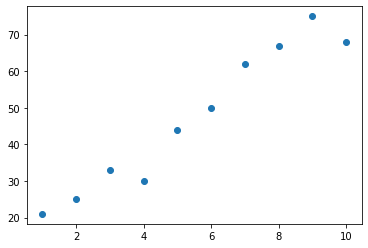

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

# In this example salary is the target (y) variable (Salary) and experience is
# the feature (X) variable.

y = np.array([21,25,33,30,44,50,62,67,75,68])
X = np.array([1,2,3,4,5,6,7,8,9,10])

plt.scatter(X, y)

In [4]:
# To calculate this by hand I need each metric for y = mX + b
# Below I compute (m) the formula is:

# (n * (sum(x*y)) - (sum X * sum y)) / (n * (sum X^2) - (sum X)^2)

m = ((len(X) * np.sum(X*y) - np.sum(X) * np.sum(y)) /
    (len(X)*np.sum(X*X) - np.sum(X) ** 2))
    
m

6.333333333333333

In [5]:
# So the formula is now y = 6.33 * X + b
# next the intercept (b) is calculated using formula:

# (sum y - (m * sum X)) / len(x)

b = (np.sum(y) - m *np.sum(X)) / len(X)
b

12.666666666666668

In [6]:
# So the best fit line formula is: 6.33(X) + 12.66 

def predict(x):
    return m * x + b

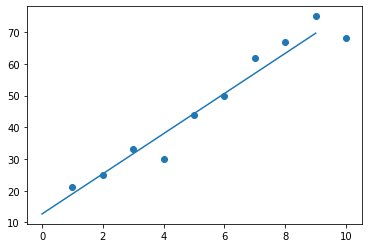

In [7]:
# Graphing the best fit line

vec = np.arange(10)
plt.scatter(X,y)
plt.plot(vec,predict(vec))

## Below a function is created that mimics sklearn's LinearRegression() model. 

In [8]:
def getlinear(x,y):
 
    def inner(x1):
        return m * x1 + b
    
    m = (len(x) * np.sum(x*y) - np.sum(x) * np.sum(y)) / (len(x)*np.sum(x*x) - np.sum(x) * np.sum(x))
    b = (np.sum(y) - m *np.sum(x)) / len(x)
    return inner

predict = getlinear(X,y)

predict(3)

31.666666666666668

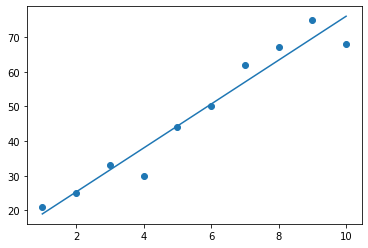

In [9]:
plt.scatter(X,y)
plt.plot(X,predict(X))

## For multiple linear regression, each feature has its mean calculated unto itself in the exact same manner, Below is an example of how this would be done using two features instead of one:

In [11]:
# feature 1 slope
m1 = (np.sum(X2*X2)*np.sum(X1*Y) - np.sum(X1*X2)*np.sum(X2*Y))/ \
        (np.sum(X1*X1)*np.sum(X2*X2)-np.sum(X1*X2)*np.sum(X1*X2))

# feature 2 slope
m2 = (np.sum(X1*X1)*np.sum(X2*Y) - np.sum(X1*X2)*np.sum(X1*Y))/ \
        (np.sum(X1*X1)*np.sum(X2*X2)-np.sum(X1*X2)*np.sum(X1*X2))

# two feature intercept calculation
b = np.mean(Y) - a1*np.mean(X1) - a2*np.mean(X2)

## A simple linear regression between two variables can be quickly calculated using a native scipy function linregress()

https://stackoverflow.com/questions/9538525/calculating-slopes-in-numpy-or-scipy

In [14]:
# Note that the scipy.stats library has a built in linregress function
# that will calculate all of the above at once

print(scipy.stats.linregress(X, y))

m = np.round(scipy.stats.linregress(X, y).slope,2)
b = np.round(scipy.stats.linregress(X, y).intercept,2)

print()
print(f'Best Fit Line: {m} * X + {b}')

LinregressResult(slope=6.333333333333333, intercept=12.666666666666671, rvalue=0.9709007393853264, pvalue=3.028721086834458e-06, stderr=0.5523137740908746)

Best Fit Line: 6.33 * X + 12.67


---
# <a name='two'></a>2. Ridge, Lasso, and Elastic-Net Regression
**Ridge, Lassso, and Elastic-Net** regression models are all types of 'shrinkage' estimators. Each one of these models uses regularization to counter linear regression model problems such as multicollinearity and overfitting. 

Simple Linear Regression and Multiple Linear Regression models use the ordinary least squares (OLS) method. This finds the coefficients that best fit line for a given data set, however OLS does not consider the relative importance of the independent variables overall. Therefore OLS models can have unnecessary variables that add noise to the results. 

Below is a link that describes the need for Ridge, Lasso, and Elastic Net and the pitfalls of ordinary Linear/Multiple Regression:

https://towardsdatascience.com/ridge-regression-for-better-usage-2f19b3a202db

Prior to delving into each model individually, some important definitions must be examined:

**Parsimonious Models** explain data with a minimum number of parameters, or predictor variables. Parsimonious models have optimal parsimony, or just the right amount of predictors needed to explain the model well (low bias, low variance). There is generally a bias/variance tradeoff between goodness of fit and parsimony: low parsimony models (i.e. models with many parameters) tend to have a better fit than high parsimony models. This is not usually a good thing; adding more parameters usually results in a good model fit for the data at hand, but that same model will likely be useless for predicting other data sets as the results can be widely unpredictable. 

for more on bias/variance trade-off, see the Machine Learning Overview notebook

**Shrinkage** is where extreme values in a sample are “shrunk” towards a central value, like the sample mean. Shrinking data can result in:

* **Shrinkage Positives**
* Better, more stable, estimates for true population parameters
* Reduced sampling and non-sampling errors
* Smoothed spatial fluctuations


* **Shrinkage Negatives**
* Serious errors can occur if the population has an atypical mean
* Shrunk estimators can become biased estimators, tending to underestimate the true population parameters
* Shrunk fitted models can perform more poorly on new data sets compared to the original data set used for fitting. Specifically, r-squared “shrinks"

**Shrinkage Estimator** produces a new estimate by shrinking a raw estimate (like the sample mean). For example, two extreme mean values can be combined to make one more centralized mean value; repeating this for all means in a sample will result in a revised sample mean that has “shrunk” towards the true population mean

**Regularization** is a way to avoid overfitting by penalizing high-valued regression coefficients. In simple terms, it reduces parameters and shrinks (simplifies) the model. This more streamlined, more parsimonious model will likely perform better at predictions. Regularization is necessary because least squares regression methods (where the residual sum of squares is minimized) can be unstable. This is especially true if there is multicollinearity in the model.

**Alpha (sometimes Lambda)** is the regularization penalty used with Regularization models. Higher alpha's reduce the magnitude of coefficients(i.e. reduces model complexity through shrinkage)

**Unbiased Models** - make weak or no assumptions about the form of the unknown underlying function that maps inputs to outputs in a dataset. Unbiased models treat all variables equally and become more complex as new variables are added, these models tend to have lower bias (fits the line well) and higher variance (unreliable predictions), thus they are prone to overfitting and subject to adding 'noise' to the analysis

**Biased Models** - make strong assumptions about the form of the unknown underlying function that maps inputs to outputs in a dataset. These models will tend to have higher bias (doesn't fit the line as well) and lower variance (has consistent predictions), OLS linear regression is an example of one such model as these models are used to predict the best fit line formula (i.e. the unknown underlying function). Biased models are prone to underfitting. 

The image below depicts the 'sweet spot' where model bias and varaince meet. The ideal output would minimize the total error so that it comes as close as possible to this 'sweet spot'. Note that the OLS is a more complex model, therefore it will always produce results towards the right of this diagram (therefore far from the sweet spot). Regularization models (i.e. Ridge, Lasso, Elastic-Net) can be used to bring the total error closer to the sweet spot. 

<img src='images/ridge1.png' width=450px>

---

## Formula Overview
Essentially the broad overall formula for Lasso and Ridge models is the same excepting the error term, namely:
### $ y = XB + e$
* y = dependent variable
* X = independent variables
* B = predicted regression coefficient
* e = errors/residuals (this the penalty term and is the only difference between lasso/ridge/elastic-net models and regular OLS linear regression models. The error formula differs between each model)

Note 1: y = XB is simply the normal OLS regression formula
Note 2: if an intercept in included, it is usually left unchanged

---

## Ridge Regression
Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients rather than setting them to 0 or removing them altogether. 

Removing predictors from the model can be seen as settings their coefficients to zero. Instead of forcing them to be exactly zero, ridge regression penalizes them if they are too far from zero, thus enforcing them to be small in a continuous way. Thus, decrease model complexity while keeping all variables in the model. 


### Ridge Regression Formula
Below is the (e) in y = XB + e for ridge regresion:
<img src='images/ridge_math.png' width=200px>


### Ridge Regression Models Use L2 Regularization
Ridge Regression uses L2 regularization which adds a penalty (the alpha parameter) equal to the square of the magnitude of coefficients. L2 will not yield sparse models and all coefficients are shrunk by the same factor (none are eliminated).
* An alpha of 0 means no penalty given and the model is essentially linear regression
* A high alpha with ridge will penalize the parameters (through shrinkage) but not ever fully remove (or set a coeficient to 0) a particular metric. 

---

## LASSO Regression (Least Absolute Shrinkage Selector Operator)
**Lasso regression** is a type of **linear regression** that uses shrinkage. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of muticollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination in models with a large number of features where large means either:
1. Large enough to enhance the tendency of the model to over-fit, **a minimum of ten variables can cause overfitting**
2. Large enough to cause computational challenges. This situation can arise in case of millions or billions of features 

Similar to Ridge Regression, Lasso also penalizes the absolute size of the regression coefficients. In addition, it is capable of reducing the variability and improving the accuracy of linear regression models. Lasso regression differs from ridge regression in a way that it uses absolute values in the penalty function, instead of squares. 


### Lasso Model Forumla
<img src='images/lasso_math.png'>
Where the formula left of the + (y = XB) is just OLS linear regression and the error (e) is the formula to the right of the +. The goal of lasso is to minimize the output of the above equation (i.e. minimizing the sum of squares using the alpha/lambda constraint)


### L1 Regularization
Lasso models uses L1 regularization, which adds a penalty (the alpha/lambda parameter) equal to the absolute value of the magnitude of coefficients (e in the formula). In other words, it limits the size of the coefficients. This type of regularization can result in sparse models with few coefficients; Some coefficients can become zero and be eliminated from the model. Larger penalties result in coefficient values closer to zero, which is the ideal for producing simpler models.
* When alpha/lambda = 0, no parameters are eliminated, estimate is just OLS linear regression
* As alpha/lambda increases, more and more coefficients are set to zero and eliminated (theoretically, when λ = ∞, all coefficients are eliminated) 
* As alpha increases, bias increases
* As alpha decreases, variance increases

see the link below for a good example of the alpha effect with Lasso:

https://chrisalbon.com/machine_learning/linear_regression/effect_of_alpha_on_lasso_regression/

---

## Elastic-Net Regression
Elastic-Net is a linear regression model trained with both L1 and L2
regularization of the coefficients. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge, effectively getting the best of both worlds.

Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

A practical advantage of trading-off between Lasso and Ridge is that it allows Elastic-Net to inherit some of Ridge’s stability under rotation.

---

## Important Usage Points
* All three models can be useful when there are high levels of muticollinearity between feature variables, especially if this is causing unreliability in a linear regression model
* Lasso tends to do well if there are a small number of significant parameters and the others are close to zero (i.e. when only a few predictors actually influence the response)
* Ridge works well if there are many large parameters of about the same value (i.e. when most predictors impact the response)
* The size of respective alpha values can be tuned via cross-validation to find the ideal alpha for a given data set


## Lasso, Ridge, and Elastic-Net Model Evaluation Metrics
Each one of these models attempt to rectify issues with Linear Regression models. Therefore, the same evaluation metrics used with multiple linear regression models will work for these as well


## Linear Regression Example with High Multicolinearity
Because Lasso, Ridge, and Elastic-Net are all used to fix issues with linear regression models that contain highly correlated feature variables I first want to show an example of data with high collinearity.

Note that depending on the situation, it may not be an issue if there is slight or moderatae collinearity. However, if correlation between two features is >0.8 or the Variance Inflation Factor (VIF) >20 then it is advised to solve the issue. 

https://towardsdatascience.com/multi-collinearity-in-regression-fe7a2c1467ea

---
# <a name='three'></a>3. Polynomial Regression
Polynomial regression is a form of regression analysis in which the relationship between the independent variable X and the dependent variable y is modelled as an nth degree polynomial in X. Polynomial regression fits a **non-linear** relationship between the value of X and the corresponding conditional mean of y. A polynomial regression equation if the power of independent X variable is >1. Transalation: use polynomial regression if there is some form of relationship (or pattern) other than linear between two data points.

---

##  Polynomial Regression Formula: y = b + mX^2

* Where, y = dependent variable, X = independent variable, b = y-intercept, m = slope of the line (or coefficient)


With polynomial regression, the 'best fit line' is not straight but rather a curve that fits to exponential data points. Note that the number of line curves correspont with the value of the X's nth degree (or value), see below graph for examples:

<img src='images/poly1.png'>

---

## Common use-cases for Polynomial regression are:

* **Business trend analysis and forecasting** (example, company trying to predict sales numbers based on amount spent on advertising or estimating growth in sales future sales based on current economic conditions)
* **Time Series Modeling** (stock prices)
* **Pricing change impact on business**
* **Risk assesments** (insurance, financial services, etc.)
* **Numerical weather predictions** (what tempurature tomorrow)

---

## Assumptions of Polynomial Regression
All of the assumptions for linear regression hold for polynomial regression except:
* Polynomial regression does not require the X and y variables to be linearly related
* The level of degree will increase the fit of the model, however it can also cause under/over fitting. 

### How to Determine Optimal nth degree for X
There are two techniques used in deciding the optimal degree for a polynomial equation:
* Forward Selection - a method where the degree is increased until it is significant enough to define the model
* Backward Selection - a method where the degree is decreased until it is significant enough to define the model

## Model evaluation is handled in the same manner as linear regression, i.e RMSE, MAE, R2, ect. 

## IMPORTANT NOTE
Polynomial Regression is used for POLYNOMIAL FEATURES not target variables. Most of the below example is data wrangling, but in the end I incorrectly tried to use Polynomial regression by using my polynomial feature (prices) as my target variables. Remember, with Regression, only NORMALLY DISTRIBUTED data can be used as target variable/s

---
# TODO: Example of polynomial regression between two variables


Good Link Explaining Polynomial Regression

https://www.kaggle.com/thaddeussegura/enough-to-be-dangerous-polynomial-regression

---
# <a name='four'></a>4. Generalized Linear Models (GLM)
The term generalized linear model usually refers to conventional linear regression, however, this term can also be attributed to a larger class of models (often nonlinear).

There are three components to any GLM:
1. **Random Component** - refers to the probability distribution of the response variable (Y); e.g. normal distribution for Y in the linear regression, or binomial distribution for Y in the binary logistic regression
2. **Systematic Component** - specifies the explanatory variables (X1, X2, ... Xk) in the model, more specifically their linear combination in creating the so called linear predictor
3. **Link Function** - specifies the link between random and systematic components. It says how the expected value of the response relates to the linear predictor of explanatory variables


**The table below shows most GLM's, note that not all GLM's are linear:**
<img src='images/gen1.png' width='600'>

---
### ANOVA (Analysis of Variance)
Analysis of Variance is a process of examining the difference among the means of multiple groups of data for homogeneity. ANOVA performs just like linear regression however it is used to predict a continuous outcome variable from one or more categorical features. (NOTE THE FEATURES MUST ALL BE CATEGORICAL)
* **USE THIS IF ALL FEATURES ARE CATEGORICAL BUT TARGET IS CONTINUOUS**

---
### ANCOVA (Analysis of Covariance)
ANCOVA is a blend of analysis of variance (ANOVA) and regression and it can be used as:
* An extension of multiple regression to compare multiple regression lines. When used as such, ANCOVA can test all of the regression lines to see which have different intercepts as long as the slopes for each line is the same. Like regression analysis, ANCOVA enbales one to see how features act on a target variable and can remove the effect of any covariates (that is, variable you don't really need)


* As an extension of ANOVA, ANCOVA can be used to control for covariates that aren't the main focus of your study and/or to study combinations of categorical and continuous variables on a scale as predictors (in this case the covariate is the variable of interest), just like ANOVA, ANCOVA features must be categorical (minimum of two) and the target should be continuous

---
### Log-Linear Regression
is a model that takes the form of a function whose log is a linear combination (or expression constructed from a set of terms by multiplying each term by a constant and adding the results) of the parameters of the model

---
### Poisson Regression
A **Poisson Distribution** is a discrete (non-continous) probability distribution that expresses the probability of a given number of events occuring in a fixed interval of time or space, with a known constant mean rate and independent of the time since the last event (i.e., roll of a die, non-continous set possible values and every role is independent from the next)

**Poisson Regression** is a special type of regression in which the target variable consists of 'count data'. Below are some examples when such a regression could be used:
* Determine the number of students (target count variable) who graduate based upon gender (male/female)


* Number of traffic accidents (target count var) based on weather (sunny/rain) and if a special event is taking place (yes/no)

For **continuous** predictor variables, the results will tell how a one unit increase or decrease in that variable is associated with a percentage change in the counts of the target variable (i.e. each additional point increase in GPA is associated with a 12.5% increase in number of students who graduate)

For **categorical** predictor variables, the results will interpret the percentage change in counts of one group compared to another group (i.e. # of people who finish a race in sun VS. # of peple who finish a race in rain)

**Assumptions of Poisson Regression**
* Target variable consists of count data (note in traditional linear regression target variables conssit of continuous data)


* Features are independent of one another


* The distribution of counts must follow a Poisson Distribution (that is, the observed expected counts should be similar)


* The mean and variance of the model are equal

---
### Multinomial Response Regression
multinomial logistic regression is a classification method that generalizes logistic regression to multiclass problems, i.e. with more than two possible discrete outcomes. That is, it is a model that is used to predict the probabilities of the different possible outcomes of a categorically distributed dependent variable, given a set of independent variables (which may be real-valued, binary-valued, categorical-valued, etc.)

---
# <a name='five'></a>5. Bayesian Regression
In order to understand Bayesian Regression, Bayes' theorem and Bayesian inference must first be examined:

**Bayes' Theorem** describes the probability of an event based on prior knowledge of conditions that might be related to the event (for example, if the risk of developing health problems as age increases is known, then risk to an individual based on their age can be predicted with some accuracy

**Bayesian Inference** is a method of statistical inference in which Bayes' theorem is used to update the probability for an ongoing hypothesis test as more evidence or information becomes available

**Bayesian Linear Regression** is an approach to linear regression in which the statistical analysis is undertaken within the context of Bayesian inference. Bayesian Regression uses probability distributions rather than point estimates. The response variable (y) is not estimated as a single value, but is assumed to be drawn from a probability distribution.

The aim of Bayesian Linear Regression is not to find the single “best” value of the model parameters, but rather to determine the posterior distribution for the model parameters. 

**Posterior Distribution** is the probability distribution of an unknown quantity, treated as a random variable, conditional on the evidence obtained from an experiment or survey.

For clarity of the above, in Bayesian statistics, the **posterior probability** of a random event or an uncertain proposition is the conditional probability that is assigned after the relevant evidence or background is taken into account. "Posterior", in this context, means after taking into account the relevant evidence related to the particular case being examined. 

The general idea of the Bayesian regression process is to start with an initial estimate (from prior existing data), and as more evidence or data is gathered the model becomes less wrong. Bayesian reasoning is a natural extension of our intuition.

The key takeaway here is Bayesian Regression is best used when:
* **Prior data is available along with reasonable probability assumptions for predicting future outcomes**

Link to example:

https://www.kaggle.com/sathi557/bayesian-linear-regression-demo

---
# <a name='six'></a>6. Least Angle Regression
LARS is a regression algorithm used for high-dimensional data and is similar to forward stepwise regression. At each step, it finds the feature most correlated with the target. When there are multiple features having equal correlation, instead of continuing along the same feature, it proceeds in a direction equiangular between the features.

**Some advantages of LARS are:**
* It is efficient when the number of features is significantly greater than the number of samples
* It is computationally just as fast as forward selection and has the same order of complexity as ordinary least squares
* It produces a full piecewise linear solution path, which is useful in cross-validation or similar attempts to tune the model
* If two features are almost equally correlated with the target, then their coefficients should increase at approximately the same rate. The algorithm thus behaves as intuition would expect, and also is more stable.
* It is easily modified to produce solutions for other estimators, like the Lasso.

**Some disadvantages of LARS are:**
* Susceptible to noise (outliers, ect.) as it is based upon an iterative refitting of the residuals

---
#  <a name='seven'></a>7. Support Vector Machine Regression (SVR)
Support Vector Machines Regression (SVR) gives the flexibilty to define how much error is acceptable in the model results and will find an appropriate regression line to fit the data (for example, if an error of $5,000 is acceptable when predicting housing prices, then SVR is useful). 

This powerful algorithm that allows us to choose how tolerant we are of errors, both through an acceptable error margin (ϵ) and through tuning our tolerance of falling outside that acceptable error rate (Constraints).

**Margin of Error ($\epsilon$)** - is a hyperparameter for SVR models that represents the acceptable error range 

**Constraints** - is a hyperparameter used to constrain any values that fall outside of $\epsilon$ (i.e. this allows the user to set the overall acceptable data range and can help with outliers is some situations)

Below is a graph where many different Constraint values are tested, the ultimate goal here is to maximize the percent of data that falls within the acceptable $\epsilon$ range (note that MAE is being tested here):

<img src='images/svr1.png'>

From the image above is it clear that MAE increases as C increases but the maximum data percent within $\epsilon$ maxes out when C is around 6.13, therefore the ideal hyperparameters for this model are $\epsilon$ = 5 and C = 6.13. Below is a graph os what this would look like:

<img src='images/svr2.png'>

**Some advanatages of SVM's are:**

* They are effective with high dimensional data
* They are effective when # of dimensions is greater than # of samples
* They are memory efficient due to using subset training points (aka: support vectors)
* They are versatile and can use different Kernel functions (linear/polynomial/sigmoid/ect.) including custom kernals

**Some disadvantages to SVM's are:**
* If # of features is much greater than # of samples, choosing most appropriate kernal functions adn regularization is crucial to avoid overfitting
* SVM's do not directly provide probabiliy estimates, these are calculated using (a memory expensive) five-fold cross-validation process

This link does a good job explaining SVR's, epsilon, and constraints both theoretically and visually:
https://towardsdatascience.com/an-introduction-to-support-vector-regression-svr-a3ebc1672c2


## Looks like a good example for classification
https://www.kaggle.com/bandiatindra/telecom-churn-prediction


## Looks like a good example for regression
https://www.kaggle.com/abhijithchandradas/xgboost-vs-linear-regression-vs-svm

---
#  <a name='eight'></a>8. Stochastic Gradient Descent Regression (SGD)
Stochastic gradient descent is a simple yet very efficient approach to fit linear models. It is particularly useful when the number of samples (and the number of features) is very large.

Strictly speaking, SGD is merely an optimization technique and does not correspond to a specific family of machine learning models. It is only a way to train a model. 

**Optimizers** are algorithms that adjust the weights of features to minimize the overall loss function (i.e. minimize MAE, RMSE, ect.)

This optimization is used when features have specific weights to them and if/when a bias is present. The job of the optimizer is to adjust the weights (and bias if necessary) to minimize the loss.

Often, an instance of SGDClassifier or SGDRegressor will have an equivalent estimator in the scikit-learn API, potentially using a different optimization technique. 

For example, using SGDClassifier(loss='log') results in logistic regression, i.e. a model equivalent to LogisticRegression which is fitted via SGD instead of being fitted by one of the other solvers in LogisticRegression.

Similarly, SGDRegressor(loss='squared_loss', penalty='l2') and Ridge solve the same optimization problem, via different means.

**IN OTHER WORDS, THERE ARE ALREADY BUILT IN MODELS THAT PERFORM THE SAME AS SOME SGD OPTIMIZATION SETTINGS. THEREFORE, SGD SHOULD ONLY BE USED IF THOSE MODELS ARE NOT SUFFICIENT AND MORE (OR DIFFERENT) OPTIMIZATION IS REQUIRED**

Here is a good example where SGD Regresssion optimization is used:
https://www.kaggle.com/ryanholbrook/stochastic-gradient-descent

---
#  <a name='nine'></a>9. Nearest Neighbor Regression

In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric alogrithm (no assumptions about data made) used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether KNN is used for classification or regression:

* In KNN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

* In KNN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.

**Some advanatages of KNN are:**
* No assumptions are made about the data
* KNN can be used for both regression and classification
* KNN is simple to use and is often highly accurate
* There is no splitting of the data into training and test sets (i.e. all training data is used)

**Some disadvantages to KNN are:**
* Computationally expensive for large datasets
* Sensetive to the scale of the dataset and can be thrown off by irrelevant features quite easily 
* Choosing the incorrect value of K (the wrong number of neighbors to consider, or the number of potentially different class choices overall) can result in bad predictions, thus choosing the proper value of k is extremely important


---
#  <a name='ten'></a>10. Gaussian Process Regression (GPR)
GPR are generic supervised learning methods designed to solve regression and probabilistic classification problems.

**Gaussian Process** is a stochastic process (a collection of random variables indexed by time or space), such that every finite collection of those random variables has a multivariate normal distribution, i.e. every finite linear combination of them is normally distributed.

A machine-learning algorithm that involves a Gaussian process uses lazy learning and a measure of the similarity between points (the kernel function) to predict the value for an unseen point from training data. The prediction is not just an estimate for that point, but also has uncertainty information—it is a one-dimensional Gaussian distribution. For multi-output predictions, multivariate Gaussian processes are used, for which the multivariate Gaussian distribution is the marginal distribution at each point. 



**Some advantages of GPR's are:**
* The prediction interpolates the observations (at least for regular kernels)
* The prediction is probabilistic (Gaussian) so that one can compute empirical confidence intervals and decide based on those if one should refit (online fitting, adaptive fitting) the prediction in some region of interest
* Versatile: different kernels can be specified. Common kernels are provided, but it is also possible to specify custom kernels

**Some disadvantages of GPR's are:**
* Computationally Expensive
* They are not sparse (i.e. non-parametric), they use the whole samples/features information to perform the prediction
* They lose efficiency in high dimensional spaces – namely when the number of features exceeds a few dozens


Below is a good link that explains Bayesian Inference and Gaussian Process well:
https://towardsdatascience.com/an-intuitive-guide-to-gaussian-processes-ec2f0b45c71d

---
#  <a name='eleven'></a>11. Decision Tree Regression
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

**Some advantages of Decision Trees are:**
* Simple to understand and interpret, can also be visualized
* Requires little data preparation (no normalization, dummy vars, ect.)
* Can handle both numerical and categorical data
* can handle multi-output problems

**Some disadvanatages of Decistion Trees are:**
* Decision-tree learners can create over-complex trees that do not generalise the data well (overfitting). Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the **maximum depth** of the tree are necessary to avoid this problem
* Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble
* Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree



Link to Explore more:

https://www.kaggle.com/thaddeussegura/enough-to-be-dangerous-decision-tree-regression

---
#  <a name='twelve'></a>12. Random Forest Regression
**Random Forest** is an ensemble algorithm capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap Aggregation, commonly known as bagging.

The basic idea behind Random Forest Tree analysis is to combine multiple decision trees in determining the final output rather than relying on individual decision trees. when splitting each node during the construction of a tree, the best split is found either from all input features or from a random subset size.

Note that individual decision trees typically exhibit high variance and tend to overfit. The injected randomness in forests yield decision trees with somewhat decoupled prediction errors. By taking an average of those predictions, some errors can cancel out. Random forests achieve a reduced variance by combining diverse trees, sometimes at the cost of a slight increase in bias. In practice the variance reduction is often significant hence yielding an overall better model.

**Bagging** involves training each decision tree on a different data sample where sampling is done with replacement (note this is bagging in relation to Random Forest only)

**Random Forest Regression** is an ensemble of decision trees where:
* Each tree is created from a different sample of rows and at each node, a different sample of features is selected for splitting (the randomness)
* Each tree makes its own individual prediction
* The predictions are averaged together for a single result


### Use Random Forest Regression when the data has a non-linear trend and extrapolation (unknown inferences) outside of the tranining data is not important

### Avoid Random Forest Regression when using time-series data

Link To Explore More:

https://www.kaggle.com/thaddeussegura/enough-to-be-dangerous-random-forest-regression